## Customizing the pipeline

### Reading the corpus

The Corpus class that represents the feature matrix which is the starting point for the analysis basically is a data frame that maps combinations of documents and features to feature counts. When _building_ the representation, it uses two helper classes to decouple aspects that are relevant for building the feature matrix: FeatureGenerator performs the actual reading and feature counting, DocumentDescriber provides labels and groupings for the documents that can be used in visualization and evaluation steps.

When you just create a corpus using `delta.Corpus(directory)`, default versions will be used, but stuff can be customized:

In [1]:
import delta
help(delta.Corpus.__init__)

Help on function __init__ in module delta.corpus:

__init__(self, subdir=None, file=None, corpus=None, feature_generator=FeatureGenerator(encoding='utf-8', token_pattern=regex.Regex('\\p{L}+', flags=regex.V0), lower_case=False, max_tokens=None, glob='*.txt', skip=None, ngrams=None), document_describer=<delta.util.DefaultDocumentDescriber object at 0x7fc327c989e8>, metadata=None, **kwargs)
    Creates a new Corpus.
    
    Args:
        subdir (str): Path to a subdirectory containing the (unprocessed) corpus data.
        file (str): Path to a CSV file containing the feature vectors.
        corpus (pandas.DataFrame): A dataframe or :class:`Corpus` from which to create a new corpus, as a copy.
        feature_generator (FeatureGenerator): A customizeable helper class that will process a `subdir` to a feature matrix, if the `subdir` argument is also given.
        metadata (dict): A dictionary with metadata to copy into the new corpus.
        **kwargs: Additional keyword arguments will

E.g., to create a corpus that ignores case differences and reads only the first 5000 tokens of each text:

In [2]:
corpus = delta.Corpus('../../refcor/German', feature_generator=delta.FeatureGenerator(lower_case=True, max_tokens=5000))
corpus.ix[:5,100:110]

,wird,mutter,ihnen,bis,zeit,ihren,etwas,wurde,dir,konnte
"Arnim,-Ludwig-Achim-von_Armut Reichtum Schuld und Busse der Graefin Dolores",1.0,4.0,18.0,9.0,5.0,7.0,8.0,9.0,2.0,2.0
"Arnim,-Ludwig-Achim-von_Isabella von Aegypten",8.0,4.0,6.0,8.0,4.0,8.0,6.0,6.0,9.0,13.0
"Arnim,-Ludwig-Achim-von_Kronenwaechter 1",15.0,1.0,3.0,2.0,10.0,1.0,4.0,2.0,6.0,1.0
"Dohm,-Hedwig_Christa Ruland",2.0,17.0,6.0,8.0,2.0,20.0,13.0,11.0,1.0,7.0
"Dohm,-Hedwig_Schicksale einer Seele",8.0,22.0,5.0,17.0,7.0,3.0,7.0,9.0,7.0,6.0


It is also possible to roll your own feature generator. As an example, we would like to use lemmas instead of word forms as features. For that, we would like to read a version of our corpus that has been preprocessed using the DARIAH DKPro wrapper.

A file like this is essentially a table that contains a line per token with various analyses in the columns:

In [3]:
import pandas as pd
import csv
dof_example = pd.read_table('../../refcor/dof/German/Huber,-Therese_Luise.txt.csv', quoting=csv.QUOTE_NONE, sep='\t')
dof_example.iloc[1003:10010]

,SectionId,ParagraphId,SentenceId,TokenId,Begin,End,Token,Lemma,CPOS,POS,...,Morphology,Hyphenation,DependencyHead,DependencyRelation,NamedEntity,QuoteMarker,CoreferenceChainIds,SyntaxTree,Predicate,SemanticArgumentIndex
1003,_,8,24,1003,5826,5836,Thatsachen,Thatsachen,NN,NN,...,_,That-sa-chen,1002,NK,_,0,_,_,_,_
1004,_,8,24,1004,5837,5844,annimmt,annehmen,V,VVFIN,...,_,an-nimmt,991,CJ,_,0,_,_,_,_
1005,_,8,24,1005,5844,5845,",",",",PUNC,"$,",...,_,",",1004,--,_,0,_,_,_,_
1006,_,8,24,1006,5846,5848,so,so,ADV,ADV,...,_,so,1007,MO,_,0,_,_,_,_
1007,_,8,24,1007,5849,5853,wird,werden,V,VAFIN,...,_,wird,-1,--,_,0,_,_,_,_
1008,_,8,24,1008,5854,5856,er,er,PR,PPER,...,_,er,1007,SB,_,0,_,_,_,_
1009,_,8,24,1009,5857,5861,sich,sich,PR,PRF,...,_,sich,1030,OA,_,0,_,_,_,_
1010,_,8,24,1010,5862,5866,doch,doch,ADV,ADV,...,_,doch,1030,MO,_,0,_,_,_,_
1011,_,8,24,1011,5866,5867,",",",",PUNC,"$,",...,_,",",1010,--,_,0,_,_,_,_
1012,_,8,24,1012,5868,5872,eben,eben,ADV,ADV,...,_,eben,1030,MO,_,0,_,_,_,_


So, here is a simple lemma-based feature generator:

In [4]:
class DOFLemmaFG(delta.FeatureGenerator):
    
    def process_file(self, filename):
        dof = pd.read_table(filename, sep='\t', quoting=csv.QUOTE_NONE)
        tokens = dof[dof.CPOS != 'PUNC']                  # only non-punctuation tokens
        counts = tokens.Lemma.value_counts()              # count the different values -> Series
        counts.name = self.get_name(filename)
        return counts

Now, we can pass this in to Corpus:

In [5]:
lemma_corpus = delta.Corpus('../../refcor/dof/German', feature_generator=DOFLemmaFG(glob='*.txt.csv'))
lemma_corpus.iloc[0:5,125:130]

,lieb,glauben,Mutter,ob,beide
"Arnim,-Ludwig-Achim-von_Armut%20Reichtum%20Schuld%20und%20Buße%20der%20Gräfin%20Dolores.txt",152.0,124.0,95.0,107.0,188.0
"Arnim,-Ludwig-Achim-von_Isabella%20von%20Ägypten.txt",48.0,31.0,24.0,42.0,49.0
"Arnim,-Ludwig-Achim-von_Kronenwächter%201.txt",96.0,90.0,188.0,138.0,161.0
"Dohm,-Hedwig_Christa%20Ruland.txt",68.0,56.0,67.0,70.0,20.0
"Dohm,-Hedwig_Schicksale%20einer%20Seele.txt",85.0,97.0,164.0,82.0,17.0


Rest of the steps can be performed as before:

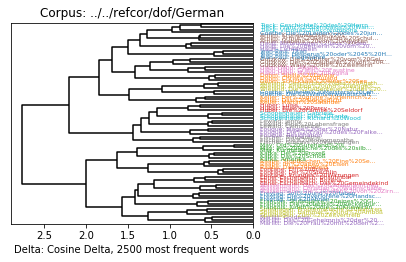

In [6]:
c2500 = lemma_corpus.get_mfw_table(2500)
distances = delta.functions.cosine_delta(c2500)
clustering = delta.Clustering(distances)
delta.Dendrogram(clustering).show()

In [7]:
pd.concat((distances.evaluate(), clustering.fclustering().evaluate()))

F-Ratio                0.347514
Fisher's LD            2.159179
Simple Score           3.828408
Cluster Errors         1.000000
Adjusted Rand Index    0.965961
Homogeneity            0.990683
Completeness           0.992079
V Measure              0.991380
Purity                 0.986667
Entropy                0.009317
dtype: float64